# In this project we will combrise between Logistic regression & SVM & KNN & Nieve Bayes & Decision Tree and Random Forest for models classification (shown below) using scikit-learn . Our training data set contains continuous and categorical data from the UCI Machine Learning Repository to predict whether or not a patient has heart disease.

We will go through 11 tasks to implement our project:

Task 1: Import the important library and exploring the dataset.

Task 2: Identifying Missing Data and dealing with them.

Task 3: Split the Data into Dependent and Independent Variables

Task 4: One-Hot Encoding

Task 5: Centering and Scaling

Task 6: Logistic regression model

Tssk 7: Support vector machine classifier model.

Task 8: K nearest neighbore classifier model.

Task 9: Nieve Bayes model.

Task 10: Decision Tree model.

Task 11: Random Forest model.

# Task 1: Import the important library and exploring the dataset.


In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.metrics import classification_report ,accuracy_score  # this creates a classification_report
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [2]:
df= pd.read_csv('processed.cleveland.data')
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      302 non-null    float64
 1   sex      302 non-null    float64
 2   cp       302 non-null    float64
 3   restbp   302 non-null    float64
 4   chol     302 non-null    float64
 5   fbs      302 non-null    float64
 6   restecg  302 non-null    float64
 7   thalach  302 non-null    float64
 8   exang    302 non-null    float64
 9   oldpeak  302 non-null    float64
 10  slope    302 non-null    float64
 11  ca       302 non-null    object 
 12  thal     302 non-null    object 
 13  hd       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


Expected output:

         1-The data should consist of 302 data record with 14 attributes. 1 integer type, 11 float type & 2 string (object).

# Task 2: Identifying Missing Data and dealing with them.


In [5]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [6]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [7]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

Since only 6 rows have missing values, let's look at them.

In [8]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
len(df)

302

In [10]:
no_miss=df.loc[(df['ca']!='?')&(df['thal']!='?')]

In [11]:
len(no_miss)

296

# Task 3: Split the Data into Dependent and Independent Variables


In [12]:
x=no_miss.drop('hd',axis=1)
y=no_miss['hd']
x

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


# Task 4: One-Hot Encoding


In [13]:
x_encoded=pd.get_dummies(x, columns=['cp','restecg','slope','thal'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [14]:
y.unique()

array([2, 1, 0, 3, 4], dtype=int64)

Since we're only making a support vector machine that does simple classification and only care if someone has heart disease or not, we need to convert all numbers > 0 to 1.

In [15]:
y1=y>0
y[y1]=1
y.unique()

<ipython-input-15-dc5ab9792963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y1]=1
C:\Users\Hashooma\anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([1, 0], dtype=int64)

# Task 5: Centering and Scaling


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)
x_scale=scale(x_train)
xt_scale=scale(x_test)

# Task 6: Logistic regression model


In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 101)
classifier.fit(x_scale, y_train)

LogisticRegression(random_state=101)

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(xt_scale)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.79      0.84      0.81        31

    accuracy                           0.84        74
   macro avg       0.83      0.84      0.83        74
weighted avg       0.84      0.84      0.84        74



In [19]:
acc=accuracy_score(y_test, y_pred)
print('accurcy of logistic model: ',acc *100,'%')

accurcy of logistic model:  83.78378378378379 %


# Logistic regression model has accurcy accurcy 84%

#  Tssk 7: Support vector machine classifier model.


In [20]:
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.svm import SVC # this will make a support vector machine for classificaiton

In [21]:
for k in ('linear','poly','rbf','sigmoid'):
    clf=SVC(kernel=k)
    clf.fit(x_scale,y_train)
    y_pred=clf.predict(x_scale)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
0.8558558558558559
poly
0.9234234234234234
rbf
0.9009009009009009
sigmoid
0.8243243243243243


In [22]:
param=[{'C':[0.01,0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001,0.00001],'kernel':['poly']}]

gs=GridSearchCV(SVC(),param,cv=5,verbose=0)
gs.fit(x_scale,y_train)
gs.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [23]:
clf=SVC(random_state=0,C=1,gamma=0.1,kernel='poly')
clf.fit(x_scale,y_train)

SVC(C=1, gamma=0.1, kernel='poly', random_state=0)

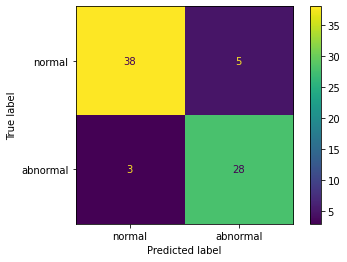

In [24]:
plot_confusion_matrix(clf,xt_scale,y_test,display_labels=['normal','abnormal'])

In [25]:
# Predicting the Test set results
y_pred = clf.predict(xt_scale)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.85      0.90      0.88        31

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



In [26]:
acc=accuracy_score(y_test, y_pred)
print('accurcy of SVM model: ',acc *100,'%')

accurcy of SVM model:  89.1891891891892 %


# SVM model has accurcy  89%

# Task 8: K nearest neighbore classifier model.


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='chebyshev')

In [29]:
#Train the model using the train sets
KNN.fit(x_scale,y_train)
y_pred = KNN.predict(xt_scale)

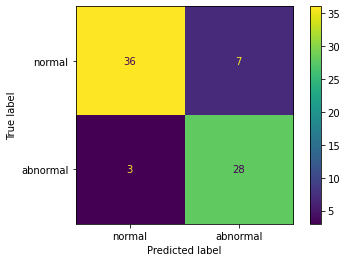

In [30]:
plot_confusion_matrix(KNN,xt_scale,y_test,display_labels=['normal','abnormal'])

In [31]:
# Predicting the Test set results
y_pred = KNN.predict(xt_scale)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.80      0.90      0.85        31

    accuracy                           0.86        74
   macro avg       0.86      0.87      0.86        74
weighted avg       0.87      0.86      0.87        74



In [32]:
acc=accuracy_score(y_test, y_pred)
print('accurcy of KNN model: ',acc *100,'%')

accurcy of KNN model:  86.48648648648648 %


# KNN model has accurcy  86%

# Task 9: Nieve Bayes model.


In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_scale, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(xt_scale)


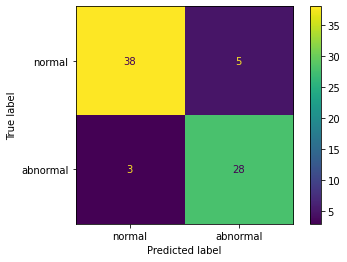

In [35]:
plot_confusion_matrix(classifier,xt_scale,y_test,display_labels=['normal','abnormal'])

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(xt_scale)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.85      0.90      0.88        31

    accuracy                           0.89        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.89      0.89      0.89        74



In [37]:
acc=accuracy_score(y_test, y_pred)
print('accurcy of naive_bayes model: ',acc *100,'%')

accurcy of naive_bayes model:  89.1891891891892 %


# naive_bayes model has accurcy  89%

# Task 10: Decision Tree model.


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
param=[{'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'max_depth':[1,2,3,4,5,6,7,8,9,10,15,20,50,100],
        'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}]

gs=GridSearchCV(DecisionTreeClassifier(),param,cv=5,verbose=0)
gs.fit(x_scale,y_train)
gs.best_params_

C:\Users\Hashooma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Hashooma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hashooma\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Hashooma\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 284, in fit
    raise ValueError(("max_leaf_nodes {0} must be either None "
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Hashooma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test 

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 7,
 'splitter': 'random'}

In [40]:
classifier = DecisionTreeClassifier( criterion ='gini',splitter ='random',max_depth =50,max_leaf_nodes =8,random_state =0)
classifier.fit(x_scale, y_train)

DecisionTreeClassifier(max_depth=50, max_leaf_nodes=8, random_state=0,
                       splitter='random')

In [41]:
y_pred = classifier.predict(xt_scale)

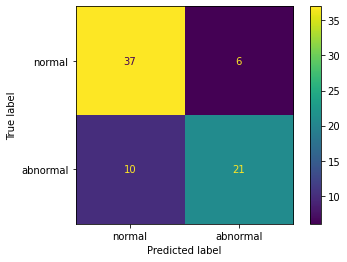

In [42]:
plot_confusion_matrix(classifier,xt_scale,y_test,display_labels=['normal','abnormal'])

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(xt_scale)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        43
           1       0.78      0.68      0.72        31

    accuracy                           0.78        74
   macro avg       0.78      0.77      0.77        74
weighted avg       0.78      0.78      0.78        74



In [44]:
acc=accuracy_score(y_test, y_pred)
print('accurcy of naive_bayes model: ',acc *100,'%')

accurcy of naive_bayes model:  78.37837837837837 %


# Decision Tree model has accurcy 78%

# Task 11: Random Forest model.

In [45]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

In [46]:
classifier = RandomForestClassifier(n_estimators = 2000, criterion = 'gini', random_state = 0)
classifier.fit(x_scale, y_train)

# Predicting the Test set results
y_pred = classifier.predict(xt_scale)

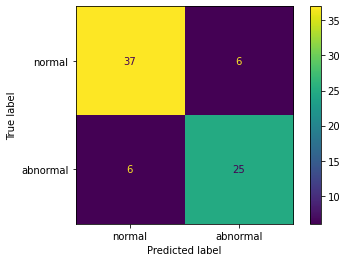

In [47]:
plot_confusion_matrix(classifier,xt_scale,y_test,display_labels=['normal','abnormal'])

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(xt_scale)
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.81      0.81      0.81        31

    accuracy                           0.84        74
   macro avg       0.83      0.83      0.83        74
weighted avg       0.84      0.84      0.84        74



In [49]:
acc=accuracy_score(y_test, y_pred)
print('accurcy of naive_bayes model: ',acc *100,'%')

accurcy of naive_bayes model:  83.78378378378379 %


#  Random Forest model has accurcy 84%

# Best wishes